## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy import stats

In [2]:
flights_1 = pd.read_csv('data/flights_1%.csv')
fuel_consumption = pd.read_csv('data/fuel_consumption.csv')
passengers_10 = pd.read_csv('data/passengers_10%.csv')
test = pd.read_csv('data/test.csv')
pd.set_option('display.max_columns', None)

In [3]:
flights_1.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [4]:
flights_1.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-19,WN,WN,WN,493,WN,N421LV,493,13342,MKE,"Milwaukee, WI",13204,MCO,"Orlando, FL",1140,1146.0,6.0,9.0,1155.0,1513.0,6.0,1515,1519.0,4.0,0,NaN,0,N,155,153.0,138.0,1,1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-19,WN,WN,WN,51,WN,N7719A,51,13495,MSY,"New Orleans, LA",11259,DAL,"Dallas, TX",1655,1655.0,0.0,10.0,1705.0,1816.0,7.0,1820,1823.0,3.0,0,NaN,0,N,85,88.0,71.0,1,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-19,WN,WN,WN,2398,WN,N724SW,2398,13495,MSY,"New Orleans, LA",12191,HOU,"Houston, TX",610,620.0,10.0,12.0,632.0,725.0,3.0,730,728.0,-2.0,0,NaN,0,N,80,68.0,53.0,1,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-19,WN,WN,WN,943,WN,N8685B,943,13796,OAK,"Oakland, CA",12889,LAS,"Las Vegas, NV",1745,1745.0,0.0,13.0,1758.0,1901.0,5.0,1910,1906.0,-4.0,0,NaN,0,N,85,81.0,63.0,1,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-19,WN,WN,WN,2443,WN,N8698B,2443,13851,OKC,"Oklahoma City, OK",11292,DEN,"Denver, CO",600,558.0,-2.0,8.0,606.0,618.0,6.0,645,624.0,-21.0,0,NaN,0,N,105,86.0,72.0,1,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_1.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,159961.000000,159961.000000,159961.000000,159961.000000,159961.000000,157456.000000,157396.000000,157305.000000,157307.000000,157242.000000,157240.000000,159961.000000,157304.000000,156904.000000,159961.000000,159961.000000,159961.000000,156938.000000,156876.000000,159961.0,159961.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,1063.000000,1063.000000,1063.000000,0.0
mean,2733.833941,2733.827927,12691.153250,12673.365914,1328.890548,1334.127718,10.518565,17.498141,1358.618059,1459.692194,7.687770,1483.098993,1464.231081,5.444909,0.016310,0.002588,137.932859,133.154144,108.025683,1.0,768.983834,20.636273,4.141072,16.071652,0.091415,27.027528,1344.516463,41.082785,40.466604,NaN
std,1864.051970,1864.214715,1522.691443,1521.415464,489.678493,503.086656,48.676050,9.969041,504.562665,532.107638,6.195948,516.991582,536.355568,50.775570,0.126666,0.050808,71.428902,71.489945,69.542472,0.0,584.696281,65.467117,35.200001,36.628748,2.582176,54.173376,506.650477,36.028926,34.924273,NaN
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-47.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-69.000000,0.000000,0.000000,18.000000,14.000000,8.000000,1.0,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,NaN
25%,1121.000000,1121.000000,11292.000000,11292.000000,915.000000,918.000000,-6.000000,11.000000,933.000000,1044.000000,4.000000,1100.000000,1048.000000,-15.000000,0.000000,0.000000,87.000000,82.000000,58.000000,1.0,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,859.000000,17.000000,17.000000,NaN
50%,2317.000000,2317.000000,12889.000000,12889.000000,1320.000000,1326.000000,-2.000000,15.000000,1340.000000,1500.000000,6.000000,1511.000000,1503.000000,-6.000000,0.000000,0.000000,119.000000,115.000000,89.000000,1.0,604.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1401.000000,30.000000,30.000000,NaN
75%,4325.000000,4325.000000,14057.000000,14057.000000,1735.000000,1743.000000,6.000000,20.000000,1759.000000,1908.000000,9.000000,1915.000000,1913.000000,8.000000,0.000000,0.000000,168.000000,163.000000,137.000000,1.0,1005.000000,17.000000,0.000000,20.000000,0.000000,33.000000,1737.500000,52.000000,51.000000,NaN
max,9391.000000,9391.000000,16869.000000,16869.000000,2359.000000,2400.000000,1671.000000,170.000000,2400.000000,2400.000000,193.000000,2359.000000,2400.000000,1648.000000,1.000000,1.000000,695.000000,685.000000,650.000000,1.0,5095.000000,1484.000000,1236.000000,1243.000000,205.000000,1648.000000,2349.000000,229.000000,229.000000,NaN


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [6]:
delay = flights_1.arr_delay

In [20]:
len(delay)

159961

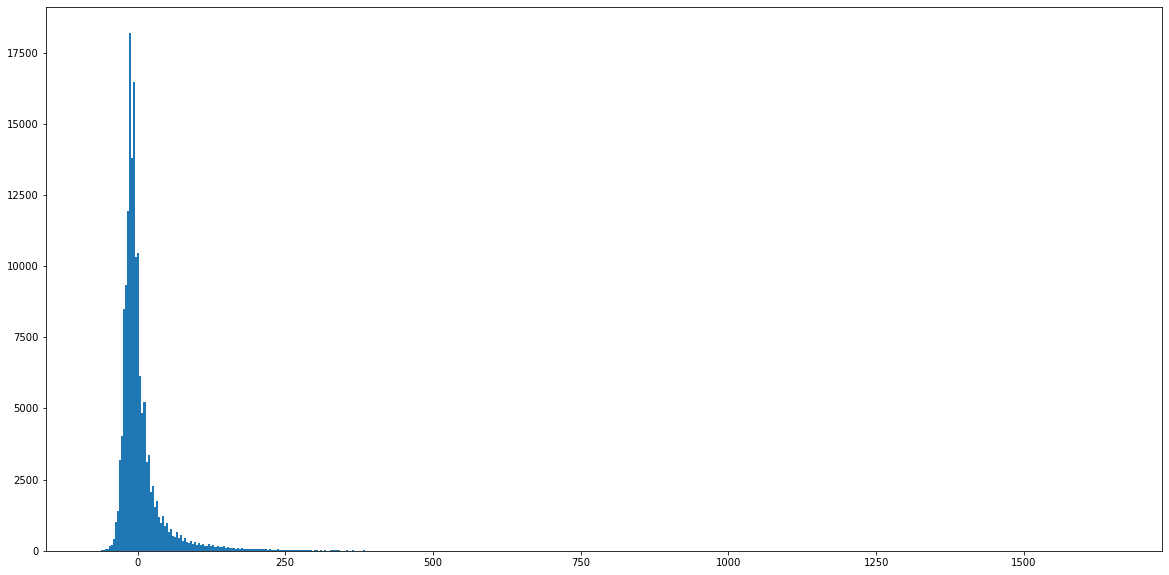

In [7]:
plt.figure(figsize=(20,10))
plt.hist(delay, bins = 500)
plt.show()

In [8]:
 stats.shapiro(delay).pvalue

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


1.0

In [ ]:
stats.lognorm()

In [19]:
delay.max()

1648.0

In [9]:
conf_int = stats.norm.interval(0.68, loc=delay.mean(), 
    scale=delay.std())

In [10]:
delay.mean()

5.44490898893591

In [18]:
delay.std()

50.77557045709183

In [11]:
conf_int

(-45.04925732659131, 55.939075304463145)

A mean of zero is definetly in the confidence interval.

In [12]:
delay.std()*3

152.3267113712755

In [13]:
delay_2 = delay[delay<delay.std()*3]

In [14]:
delay_2.std()

27.794220844686976

In [15]:
delay_2.mean()

0.8160513435545039

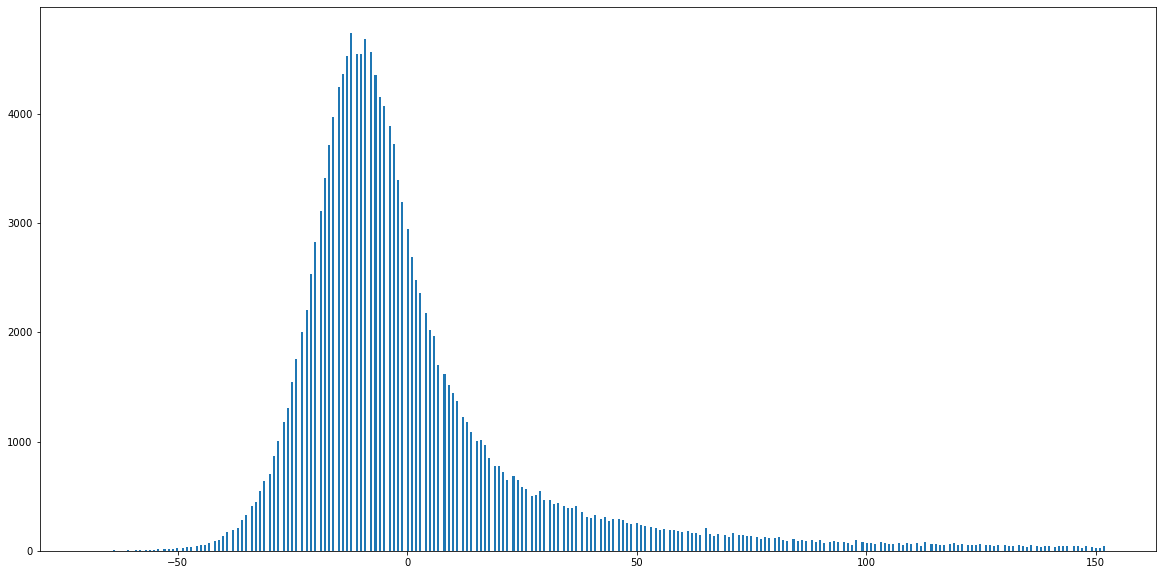

In [16]:
plt.figure(figsize=(20,10))
plt.hist(delay_2, bins = 500)
plt.show()

In [17]:
stats.shapiro(delay_2).pvalue

0.0

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [138]:
flights_1_copy = flights_1

In [126]:
flights_1.fl_date.min()

'2018-01-01'

In [127]:
flights_1.fl_date.max()

'2019-12-31'

In [133]:
int(flights_1.fl_date[0][5:7])

12

In [140]:
flights_1_copy.fl_date

0         2019-12-19
1         2019-12-19
2         2019-12-19
3         2019-12-19
4         2019-12-19
             ...    
159956    2019-12-19
159957    2019-12-19
159958    2019-12-19
159959    2019-12-19
159960    2019-12-19
Name: fl_date, Length: 159961, dtype: object

In [142]:
flights_1_copy['month']=flights_1_copy.fl_date

In [150]:
flights_1_copy.month = flights_1_copy.month.map(lambda v: int(v[5:7]))


In [159]:
flights_1_copy.groupby(['month']).mean().arr_delay

month
1     4.045410
2     5.850384
3     3.911125
4     4.774859
5     6.772098
6     9.561670
7     8.600246
8     9.695371
9     0.441340
10    2.992883
11    3.452344
12    4.633242
Name: arr_delay, dtype: float64

In [192]:
flights_1_copy.groupby(['month']).std().arr_delay

month
1     51.234291
2     49.995920
3     51.754497
4     49.645155
5     50.081872
6     52.360125
7     54.504482
8     58.972394
9     39.989330
10    46.871719
11    51.198629
12    48.746297
Name: arr_delay, dtype: float64

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?